<a href="https://colab.research.google.com/github/Nadian-Ali/ImageClassification/blob/main/PreparePreProcessedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Create datasets with pre-processed images</h1>

<p> data exlporation revealed that pre-processed data data might help the classificaiton results</p>
See: <a href="url">https://github.com/Nadian-Ali/ImageClassification/blob/113ccb7924477cedfeb160eeac5599259b981b12/ExperimentingWitXRays.ipynb</a>
<p><b>Here we use two pre processing steps</b><p>
<ul>
<li>Adaptive contrast enhancement</li>
<li>Extract edge map using Sobel mask</li>
</ul>
<p>for this reason, read all images are loaded / pre-processing steps is applied to them and then saved for later use </p>

In [ ]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive", force_remount =True)

Mounted at /content/drive


In [ ]:
import cv2

import numpy as np
import tensorflow as tf
from PIL import Image
import requests
from io import StringIO
from urllib.request import urlopen
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


In [ ]:
#cd into training images. 
%cd /content/drive/My Drive/ImageClassificationData/Train

/content/drive/My Drive/ImageClassificationData/Train


In [ ]:
%ls

<h1>Imports</h1>

In [ ]:
import os
from os import listdir
from os.path import isfile, join
import shutil

**Create folder list**

The structure of data: 

<p>Contrast enhancement =<font color ='green'>  {data folder with AP and Lateral subfolders, Test folder}</font></p>

Edge maps = <font color = 'green'>{data folder with AP and Lateral subfolders, Test folder}</font>

In [ ]:
#base path
data_path =  '/content/drive/My Drive/ImageClassificationData/'
train_data_path    = os.path.join(data_path,'Train')
test_data_path     = os.path.join(data_path,'Test')

#to write into HE
trainHE_ap_path      = os.path.join(data_path,'DataHE','AP')
trainHE_lateral_path = os.path.join(data_path,'DataHE','Lateral')

#to write into Edge
trainEdge_ap_path      = os.path.join(data_path,'DataEdge','AP')
trainEdge_lateral_path = os.path.join(data_path,'DataEdge','Lateral')

#to write test images
testEdge      = os.path.join(data_path,'TestEdge')
testHE        = os.path.join(data_path,'TestHE')

In [ ]:
testEdge

'/content/drive/My Drive/ImageClassificationData/TestEdge'

**Read file names**

In [ ]:

image_names = [f for f in listdir(train_data_path) if isfile(join(train_data_path, f))]


In [ ]:
print(len(image_names))

190


**create training data and prepare them into <font color = 'red'>AP</font> and <font color = 'red'>Lateral</font> Lateral subfolders**

In [ ]:
ap = 0
lateral = 0

for name in image_names:
  src_path = os.path.join(train_data_path,name)
  #process image 
  color = cv2.IMREAD_COLOR
  img   = cv2.imread(src_path, 0)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl1   = clahe.apply(img)
  img_blur = cv2.GaussianBlur(cl1, (3,3), 0)
  sobelx   = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge
  sobely   = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge
  sobelxy  = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combined X

  
  if "Lateral" in name:

    lateral = lateral + 1
    dst_path_HE     = os.path.join(trainHE_lateral_path,name)
    dst_path_Edge   = os.path.join(trainEdge_lateral_path,name)
    cv2.imwrite(dst_path_HE,cl1)
    cv2.imwrite(dst_path_Edge,sobelxy)
    
    #dst_path_Edge = os.path.join(train_lateral_path,name)
    #read image - pre process
    #shutil.copy(src_path, dst_path)
  else:
    ap = ap+1
    dst_path_HE     = os.path.join(trainHE_ap_path,name)
    dst_path_Edge   = os.path.join(trainEdge_ap_path,name)
    cv2.imwrite(dst_path_HE,cl1)
    cv2.imwrite(dst_path_Edge,sobelxy)


    #dst_path = os.path.join(train_ap_path,name)
    #shutil.copy(src_path,dst_path)
    #cv2.imwrite()

In [ ]:
%cd /content/drive/My Drive/ImageClassificationData/Test

/content/drive/My Drive/ImageClassificationData/Test


**Read test images and create new test folders**

In [ ]:
test_names = [f for f in listdir(test_data_path) if isfile(join(test_data_path, f))]

In [ ]:
test_names

In [ ]:
for name in test_names:
  src_path = os.path.join(test_data_path,name)
  #process image 
  color = cv2.IMREAD_COLOR
  img   = cv2.imread(src_path, 0)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl1   = clahe.apply(img)
  img_blur = cv2.GaussianBlur(cl1, (3,3), 0)
  sobelxy  = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combined X
  
  
  dst_path_HE     = os.path.join(testHE,name)
  dst_path_Edge   = os.path.join(testEdge,name)
  cv2.imwrite(dst_path_HE,cl1)
  #cv2.imwrite(dst_path_Edge,sobelxy)


<font color = 'blue'>*test code* </font>

In [ ]:
dst_path_HE

'/content/drive/My Drive/ImageClassificationData/TestEdge/204_AP.png'

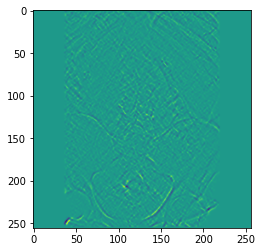

In [ ]:
src_path = os.path.join(train_data_path,image_names[-4])
#process image 

color= cv2.IMREAD_COLOR
img = cv2.imread(src_path, 0)
cv2.imwrite('/content/drive/My Drive/ImageClassificationData/imorg.png', img)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv2.imwrite('/content/drive/My Drive/ImageClassificationData/imcl1.png', cl1)
img_blur = cv2.GaussianBlur(cl1, (3,3), 0)
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)  # Sobel Edge
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)  # Sobel Edge
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combined X

cv2.imwrite('/content/drive/My Drive/ImageClassificationData/im.png', sobelxy)
plt.imshow(sobelxy)

In [ ]:
np.shape(img)

(256, 256, 3)